In [1]:
import os
os.chdir('C:\\Users\\telug\\OneDrive\\Desktop\\WD_python')
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

In [2]:
#read_file = pd.read_excel ("Data_File.xlsx")

In [3]:
#read_file.to_csv ("Data_files3.csv",index = None,header=None)


In [4]:
df=pd.read_csv('Data_files3.csv')

In [5]:
df

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.57653
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.87063
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.02028
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.38688
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.09773
...,...,...,...,...,...,...,...,...,...
1333,1334,Tier 3,Executive,Metro,59661,4,68,50,69712.40366
1334,1335,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.75010
1335,1336,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.77069
1336,1337,Tier 1,Executive,Non-Metro,53203,3,69,21,64044.38295


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.No.                 1338 non-null   int64  
 1   College               1338 non-null   object 
 2   Role                  1338 non-null   object 
 3   City type             1338 non-null   object 
 4   Previous CTC          1338 non-null   int64  
 5   Previous job changes  1338 non-null   int64  
 6   Graduation marks      1338 non-null   int64  
 7   Exp (Months)          1338 non-null   int64  
 8   CTC                   1338 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 94.2+ KB


In [7]:
df.drop(['S.No.'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   Previous CTC          1338 non-null   int64  
 4   Previous job changes  1338 non-null   int64  
 5   Graduation marks      1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   CTC                   1338 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [9]:
df.isnull().sum()

College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
dtype: int64

In [10]:
#CTC(Target Variable)

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of CTC')

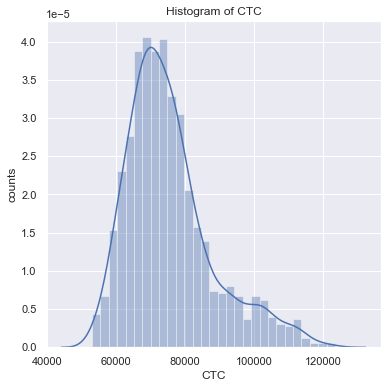

In [11]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['CTC'])
plt.show
plt.xlabel('CTC')
plt.ylabel('counts')
plt.title('Histogram of CTC') 

<AxesSubplot:>

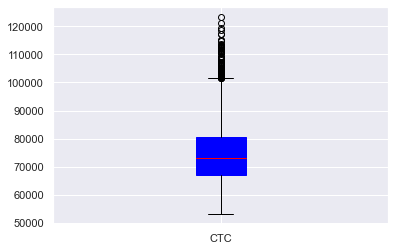

In [12]:
CTC=df['CTC']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
CTC.plot.box(color=props2,patch_artist=True,vert=True)

In [13]:
#College(Categorical)

In [14]:
df.College.value_counts()

Tier 1    649
Tier 2    364
Tier 3    325
Name: College, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Histogram of College')

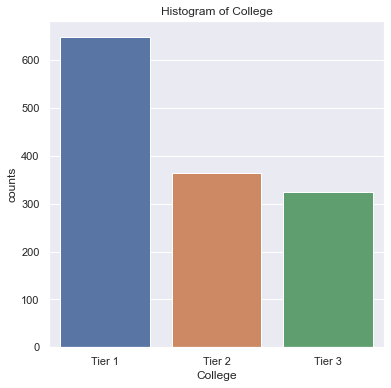

In [15]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(df['College'])
plt.show
plt.xlabel('College')
plt.ylabel('counts')
plt.title('Histogram of College')

In [16]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
annova=ols('CTC ~ College',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))#Good Predictor

                sum_sq      df         F  PR(>F)
College   6.779293e+09     2.0  22.19916     0.0
Residual  2.038445e+11  1335.0       NaN     NaN


In [17]:
#Role(categorical)

In [18]:
df.Role.value_counts()

Executive    1064
Manager       274
Name: Role, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Histogram of Role')

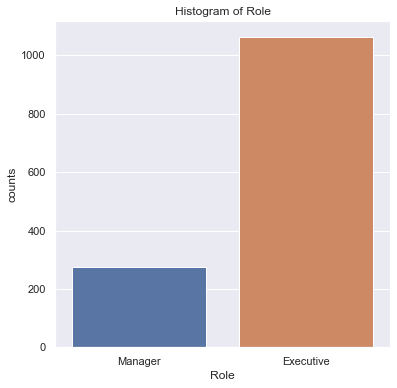

In [19]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(df['Role'])
plt.show
plt.xlabel('Role')
plt.ylabel('counts')
plt.title('Histogram of Role')

In [20]:
annova=ols('CTC ~ Role',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))#Good Predictor

                sum_sq      df        F  PR(>F)
Role      8.238949e+10     1.0  858.369     0.0
Residual  1.282343e+11  1336.0      NaN     NaN


In [21]:
#City type


In [22]:
df=df.rename({'City type':'City_type'},axis=1)

In [23]:
df.City_type.value_counts()

Metro        676
Non-Metro    662
Name: City_type, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Histogram of City_type')

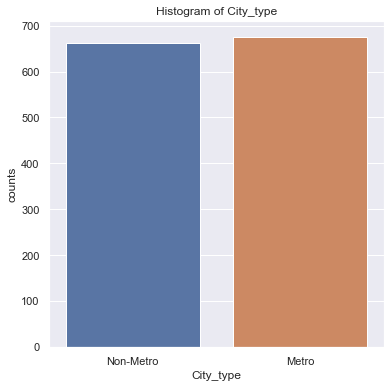

In [24]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(df['City_type'])
plt.show
plt.xlabel('City_type')
plt.ylabel('counts')
plt.title('Histogram of City_type')

In [25]:
annova=ols('CTC ~ City_type',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))#Good Predictor

                 sum_sq      df         F  PR(>F)
City_type  9.400103e+09     1.0  62.41083     0.0
Residual   2.012237e+11  1336.0       NaN     NaN


In [26]:
#Previous CTC(conti.)


In [27]:
df=df.rename({'Previous CTC':'Previous_CTC'},axis=1)

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Previous_CTC')

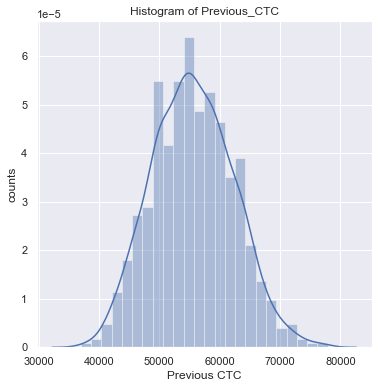

In [28]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Previous_CTC'])
plt.show
plt.xlabel('Previous CTC')
plt.ylabel('counts')
plt.title('Histogram of Previous_CTC')

<AxesSubplot:>

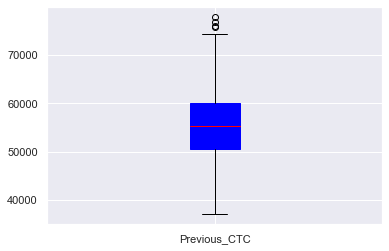

In [29]:
Previous_CTC=df['Previous_CTC']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
Previous_CTC.plot.box(color=props2,patch_artist=True,vert=True)

In [30]:
def find_boundaries(df,feature):
    Q1=df[feature].quantile(.25)
    Q3=df[feature].quantile(.75)
    IQR=Q3-Q1
    lower_boundary=Q1-1.5*IQR
    upper_boundary=Q3+1.5*IQR
    
    return lower_boundary,upper_boundary

In [31]:
lower_Previous_CTC,upper_Previous_CTC=find_boundaries(df,'Previous_CTC')
print(lower_Previous_CTC,upper_Previous_CTC)

36141.75 74555.75


In [32]:
df['Previous_CTC']=np.where(df['Previous_CTC']>upper_Previous_CTC,upper_Previous_CTC,
                         np.where(df['Previous_CTC']<lower_Previous_CTC,lower_Previous_CTC,df['Previous_CTC']))

<AxesSubplot:>

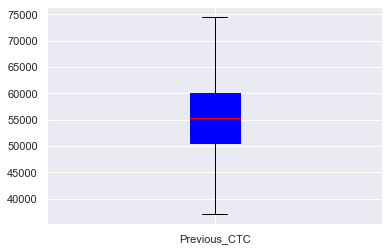

In [33]:
Previous_CTC=df['Previous_CTC']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
Previous_CTC.plot.box(color=props2,patch_artist=True,vert=True)

In [34]:
#Previous job changes(categorical)


In [35]:
df=df.rename({'Previous job changes':'Previous_job_changes'},axis=1)

In [36]:
df.Previous_job_changes.value_counts()

3    348
4    344
1    333
2    313
Name: Previous_job_changes, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Histogram of Previous_job_changes')

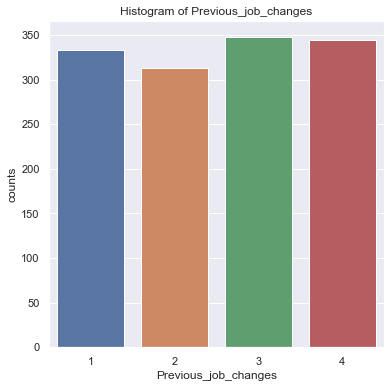

In [37]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(df['Previous_job_changes'])
plt.show
plt.xlabel('Previous_job_changes')
plt.ylabel('counts')
plt.title('Histogram of Previous_job_changes')

In [38]:
annova=ols('CTC ~ Previous_job_changes',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))#Bad Predictor

                            sum_sq      df        F   PR(>F)
Previous_job_changes  1.190530e+07     1.0  0.07552  0.78351
Residual              2.106119e+11  1336.0      NaN      NaN


In [39]:
df.drop(['Previous_job_changes'],axis=1,inplace=True)

In [40]:
#Graduation marks


In [41]:
df=df.rename({'Graduation marks':'Graduation_marks'},axis=1)

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Graduation_marks')

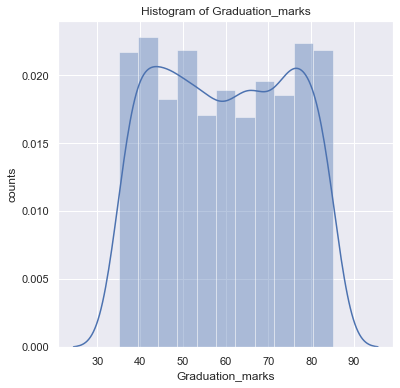

In [42]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Graduation_marks'])
plt.show
plt.xlabel('Graduation_marks')
plt.ylabel('counts')
plt.title('Histogram of Graduation_marks')

<AxesSubplot:>

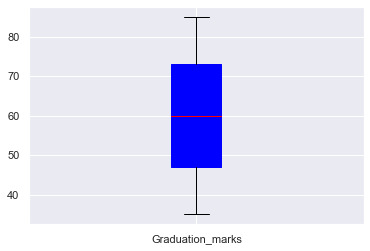

In [43]:
Graduation_marks=df['Graduation_marks']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
Graduation_marks.plot.box(color=props2,patch_artist=True,vert=True)

In [44]:
#Exp (Months)

In [45]:
df=df.rename({'Exp (Months)':'Exp_in_Months'},axis=1)

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Exp_in_Months')

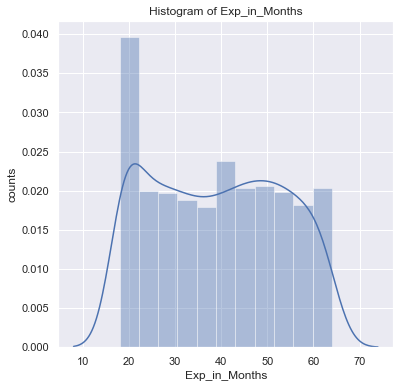

In [46]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Exp_in_Months'])
plt.show
plt.xlabel('Exp_in_Months')
plt.ylabel('counts')
plt.title('Histogram of Exp_in_Months')

<AxesSubplot:>

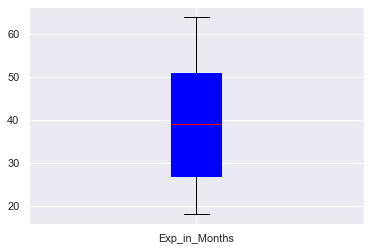

In [47]:
Exp_in_Months=df['Exp_in_Months']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
Exp_in_Months.plot.box(color=props2,patch_artist=True,vert=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   College           1338 non-null   object 
 1   Role              1338 non-null   object 
 2   City_type         1338 non-null   object 
 3   Previous_CTC      1338 non-null   float64
 4   Graduation_marks  1338 non-null   int64  
 5   Exp_in_Months     1338 non-null   int64  
 6   CTC               1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [49]:
cols = ['College', 'Role', 'City_type']

In [50]:
for col in cols:
    one = pd.get_dummies(df[col],prefix=col)
    df = pd.concat([df,one],axis=1).drop(col,axis=1)

In [51]:
df

,Previous_CTC,Graduation_marks,Exp_in_Months,CTC,College_Tier 1,College_Tier 2,College_Tier 3,Role_Executive,Role_Manager,City_type_Metro,City_type_Non-Metro
0,55523.0,66,19,71406.57653,1,0,0,0,1,0,1
1,57081.0,84,18,68005.87063,0,1,0,1,0,1,0
2,60347.0,52,28,76764.02028,0,1,0,1,0,1,0
3,49010.0,81,33,82092.38688,0,0,1,1,0,1,0
4,57879.0,74,32,73878.09773,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,59661.0,68,50,69712.40366,0,0,1,1,0,1,0
1334,53714.0,67,18,69298.75010,1,0,0,1,0,0,1
1335,61957.0,47,18,66397.77069,0,1,0,1,0,0,1
1336,53203.0,69,21,64044.38295,1,0,0,1,0,0,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Previous_CTC         1338 non-null   float64
 1   Graduation_marks     1338 non-null   int64  
 2   Exp_in_Months        1338 non-null   int64  
 3   CTC                  1338 non-null   float64
 4   College_Tier 1       1338 non-null   uint8  
 5   College_Tier 2       1338 non-null   uint8  
 6   College_Tier 3       1338 non-null   uint8  
 7   Role_Executive       1338 non-null   uint8  
 8   Role_Manager         1338 non-null   uint8  
 9   City_type_Metro      1338 non-null   uint8  
 10  City_type_Non-Metro  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(7)
memory usage: 51.1 KB


In [53]:
#MODEL BUILDING

In [54]:
X= df.drop('CTC', axis=1)
y = df['CTC']

In [58]:
#train test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=45)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr = LinearRegression()

In [59]:
lr.fit(X_train,y_train)

LinearRegression()

In [65]:
y_pred=lr.predict(X_test)

In [62]:
pred_1

array([ 67073.52927109,  68553.91778706,  96324.88153199,  66722.02300192,
        70354.87877204,  79107.1142028 ,  65638.37519304,  85720.93050149,
        68500.69602348,  86071.38949205,  65581.45445178,  75247.72034101,
        67372.60130893,  71355.46561297,  77718.43314826,  74505.32943798,
        61998.25820001,  72305.33605045,  74766.38854463,  76731.87492838,
        72815.54852058,  90638.86924301,  79890.95010189,  85991.66612764,
        80614.8678112 ,  80917.48666439,  88237.02048214,  74361.44624897,
        70943.80886065,  76964.96792036,  66207.47206765,  76519.54912133,
        65979.6739894 ,  63584.90634584,  70658.03693567,  68929.678465  ,
        66817.42751403,  82334.42854056,  94455.96987326,  68482.89297346,
        95155.83471129,  62166.35550125,  74349.17663013,  66417.13027721,
        69247.03814847,  76353.0454182 ,  72745.94879164,  78247.02338083,
        77598.56965497,  77788.27856919,  64228.65099966,  98338.38146762,
        75098.41453236,  

In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 6236.950214441767
MSE 62015255.26515927
R2 score 0.5815343331264343


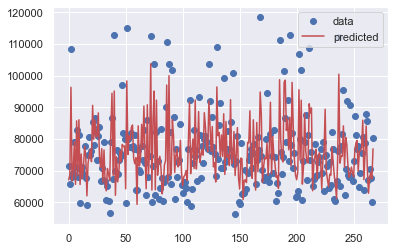

In [67]:
obsno=np.arange(0,268,1)
fig,ax=plt.subplots()
ax.plot(obsno,y_test,'o',label='data')
ax.plot(obsno,y_pred,'r',label='predicted')
ax.legend(loc='best')

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
train,test= train_test_split(df, test_size=0.2, random_state=42)

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr = LinearRegression()

In [73]:
lr.fit(X_train,y_train)

LinearRegression()

In [74]:
x_test=test.loc[:,test.columns != 'CTC']
y_test=test.loc[:,test.columns == 'CTC']

In [76]:
pred_1=lr.predict(x_test)

In [77]:
pred_1

array([ 73218.38639021,  66124.83206809,  89448.3170708 ,  69488.84507117,
        84476.59898378,  78882.43982654,  56772.28215012,  80479.35650193,
        63263.96016407,  72957.63116719,  88213.52820815,  71813.08197715,
        65949.97933568,  98733.17397748,  99153.42483104,  94939.16642571,
        74014.04255583,  90768.73911222,  66844.40920941,  87806.37053779,
        67705.63572812,  77130.04129399,  72450.92832312,  71786.08043796,
        70192.2915373 ,  78591.72212613,  81089.78618236,  64274.39036555,
        72564.87368023,  66953.85963933,  72562.40397868,  71006.34077801,
        64350.19712187,  62181.4547316 ,  72353.34132167,  83661.60241083,
        67166.38097296,  70431.62264233,  87494.10400111,  91777.15450875,
        64228.65099966,  65603.49788869,  77964.19472627,  73895.17456146,
        72565.80869891,  79689.93171362,  65109.58666034,  63389.25496045,
        93657.94654511,  73974.14548607,  73879.30412009,  63259.93688182,
        70674.62193563,  

In [78]:
y_test_series=y_test.iloc[:,0] 

In [79]:
resd_1=y_test_series-pred_1

In [80]:
resd_1

764     -3498.034360
887     -2114.673458
890     -9427.511001
1293    -1417.474381
259     12674.778536
            ...     
109      5626.762839
575     -3605.866501
535     -8179.082499
543     23771.208841
846      7777.150859
Name: CTC, Length: 268, dtype: float64

In [81]:
#Square of errors
se_1=resd_1.pow(2)

In [82]:
se_1

764     1.223624e+07
887     4.471844e+06
890     8.887796e+07
1293    2.009234e+06
259     1.606500e+08
            ...     
109     3.166046e+07
575     1.300227e+07
535     6.689739e+07
543     5.650704e+08
846     6.048408e+07
Name: CTC, Length: 268, dtype: float64

In [83]:
#Sum of Squared errors/residuals
sse_1=se_1.sum()

In [84]:
sse_1

17588937923.205193

In [85]:
#Mean sum squared errors
msse_1=sse_1/len(se_1)

In [86]:
msse_1

65630365.385094

In [87]:
import math

In [88]:
#sqr root of mean sum squared errors
math.sqrt(msse_1)

8101.2570249988985